In [30]:
import pandas as pd
import numpy as np
import random as rd 
from sklearn.decomposition import PCA
from sklearn import preprocessing 
import matplotlib.pyplot as plt


In [40]:
genes = ['gene' + str(i) for i in range(1, 101)]

wt = ['wt' + str(i) for i in range(1, 6)]
ko = ['ko' + str(i) for i in range(1, 6)]

data = pd.DataFrame(columns=[*wt, *ko], index=genes)

for gene in data.index:
    data.loc[gene, 'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10, 1000), size=5)
    data.loc[gene, 'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10, 1000), size=5)

In [42]:
print(data.head())
print(data.shape)

       wt1  wt2  wt3  wt4  wt5  ko1  ko2   ko3  ko4  ko5
gene1  420  415  394  383  406  362  395   393  408  362
gene2  649  723  681  663  690  408  382   381  413  381
gene3  394  406  377  405  387  962  982  1036  909  984
gene4  381  366  335  365  338  343  372   361  364  348
gene5  227  234  175  246  245  419  445   430  403  372
(100, 10)


In [45]:
scaled_data = preprocessing.scale(data.T)

In [47]:
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

In [49]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ['PC'+str(x) for x in range(1, len(per_var)+1)]

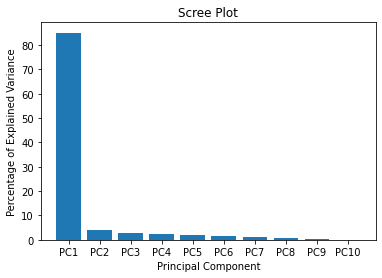

In [50]:
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [51]:
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)

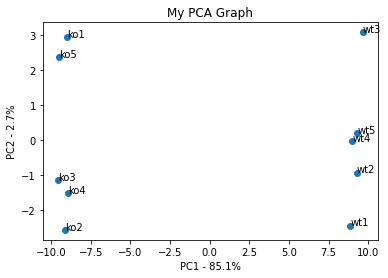

In [55]:
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[2]))

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))

plt.show()